In [1]:
from IPython.display import display
from fastprogress import master_bar, progress_bar
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=0.9)
sns.set_style("whitegrid")
sns.set_style({'font.family':'monospace'})
import os
import ntpath
from datetime import datetime
import numpy as np
import statistics 
import re
import math
import random
import pickle
import scipy.stats as scstat            
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from unidecode import unidecode
import datetime
from datetime import timedelta
import numbers
from collections.abc import MutableMapping
from fastprogress import master_bar, progress_bar
import requests,json,psutil,datetime
import timeit

import sklearn.model_selection as model_selection
import sklearn.metrics as metrics

# If true exports vectorial PDFs instead of JPG.
VECTORIAL_FIGURES = False
FIG_EXTENSION = "pdf" if VECTORIAL_FIGURES else "jpg"

ROOT_DIR = "/home/mattia/DGA-Test/"
DATA_DIR = ROOT_DIR + "Data/"
MODELS_DIR = ROOT_DIR + "Models/"
GRAPHICS_DIR = ROOT_DIR + "Graphics/" + FIG_EXTENSION + "/"

# Change path to root
os.chdir(ROOT_DIR)
print(os.getcwd())

try:
    os.makedirs(GRAPHICS_DIR)
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(MODELS_DIR)
except FileExistsError:
    # directory already exists
    pass

import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
from scipy.io import arff
from resource import getrusage as resource_usage, RUSAGE_SELF
from time import time as timestamp

njobs = 18

/home/mattia/DGA-Test


## Preprocessing

In [2]:
to_be_replaced = {
    'kraken': ['kraken_v1', 'kraken_v2'],
    'CL01': ['alureon', 'fobber_v2'],
    'CL02': ['gozi_gpl','gozi_luther', 'gozi_nasa', 'gozi_rfc4343', 'rovnix'],
    'CL03': ['pykspa_noise', 'pykspa','proslikefan', 'tempedreve', 'qadars'],
    'CL04': ['vawtrak_v2', 'vawtrak_v3'],
    'CL05': ['pizd', 'suppobox_1'],
    'CL06': ['dircrypt', 'bedep', 'ramnit'],
    'CL07': ['ranbyus_v1', 'fobber_v1', 'cryptolocker'],
    'CL08': ['ranbyus_v2', 'murofet_v2'],
    'CL09': ['qakbot', 'murofet_v1'],
    'CL10': ['matsnu', 'nymaim'],
    'CL11': ['locky', 'necurs'],
    'CL12': ['chinad', 'shiotob'],
    'CL13': ['CL06', 'CL07', 'CL08', 'CL11'],
    'CL14': ['CL03', 'vawtrak_v1', 'tinba'],
    'CL15': ['CL09', 'CL13', 'CL14'],
    'CL16': ['CL01', 'CL15', 'kraken'],
}

In [3]:
%%time
data = arff.loadarff(DATA_DIR + "M10K-000.arff")
features = pd.DataFrame(data[0])
#features = pd.read_csv(DATA_DIR + "M10K-PCA.arff", low_memory=False)

features['class'] = features['class'].str.decode('utf-8')
features.dropna(inplace=True)

print('Complete Data Shape:', features.shape)
del(data)

Complete Data Shape: (506810, 131)
CPU times: user 38.1 s, sys: 1.13 s, total: 39.3 s
Wall time: 38.4 s


In [4]:
features['class'].unique()

array(['shiotob', 'gozi_luther', 'bedep', 'tempedreve', 'ramnit',
       'kraken_v2', 'pykspa_noise', 'padcrypt', 'rovnix', 'qakbot',
       'simda', 'corebot', 'banjori', 'vawtrak_v3', 'suppobox_3',
       'ranbyus_v2', 'zeus-newgoz', 'fobber_v2', 'dircrypt', 'suppobox_1',
       'sisron', 'murofet_v3', 'pushdo', 'ccleaner', 'locky',
       'cryptolocker', 'symmi', 'dyre', 'fobber_v1', 'vawtrak_v1',
       'legit', 'alureon', 'gozi_nasa', 'tinba', 'matsnu', 'chinad',
       'proslikefan', 'murofet_v2', 'kraken_v1', 'pizd', 'necurs',
       'gozi_rfc4343', 'murofet_v1', 'qadars', 'pykspa', 'suppobox_2',
       'ranbyus_v1', 'nymaim', 'gozi_gpl', 'vawtrak_v2', 'ramdo'],
      dtype=object)

In [5]:
%%time
# Replace the classes
for key,values in to_be_replaced.items():
    for value in values:
        features['class'] = features['class'].str.replace(pat=value, repl=key, regex=False)
        
# Rebalance the dataset to remove random data from the replaced classes
features = features.sample(frac=1, random_state=42).groupby(by=['class']).head(10000)

CPU times: user 9.05 s, sys: 47.7 ms, total: 9.09 s
Wall time: 9.06 s


In [6]:
features.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209628 entries, 98509 to 122254
Data columns (total 131 columns):
nlp_1g_25p        float64
nlp_1g_50p        float64
nlp_1g_75p        float64
nlp_1g_cov        float64
nlp_1g_dist       float64
nlp_1g_dst_ca     float64
nlp_1g_dst_ch     float64
nlp_1g_dst_em     float64
nlp_1g_dst_eu     float64
nlp_1g_dst_ji     float64
nlp_1g_dst_kl     float64
nlp_1g_dst_ma     float64
nlp_1g_e          float64
nlp_1g_ken        float64
nlp_1g_kur        float64
nlp_1g_mean       float64
nlp_1g_norm       float64
nlp_1g_pea        float64
nlp_1g_pro        float64
nlp_1g_pstd       float64
nlp_1g_pvar       float64
nlp_1g_qmean      float64
nlp_1g_rep        float64
nlp_1g_ske        float64
nlp_1g_spe        float64
nlp_1g_std        float64
nlp_1g_sumsq      float64
nlp_1g_tkur       float64
nlp_1g_tpstd      float64
nlp_1g_tpvar      float64
nlp_1g_tske       float64
nlp_1g_tstd       float64
nlp_1g_tsum       float64
nlp_1g_tsumsq     float64


In [7]:
labels = features['class'].astype('category')
features.drop('class', inplace=True, axis=1) 
display(labels.cat.categories)

Index(['CL02', 'CL04', 'CL05', 'CL10', 'CL12', 'CL16', 'banjori', 'ccleaner',
       'corebot', 'dyre', 'legit', 'murofet_v3', 'padcrypt', 'pushdo', 'ramdo',
       'simda', 'sisron', 'suppobox_2', 'suppobox_3', 'symmi', 'zeus-newgoz'],
      dtype='object')

In [23]:
features_to_keep = ["nlp_l_2dn", 
                    "nlp_r_con_2dn", 
                    "nlp_r_let_fqdn",
                    "nlp_1g_norm",
                    "nlp_1g_tpstd",
                    "nlp_2g_dst_em",
                    "nlp_2g_tpstd",
                    "nlp_3g_dst_em",
                    "nlp_3g_dst_eu",
                    "nlp_3g_norm"
                   ]

features = features[features_to_keep]
features.info(verbose=True)

features.to_pickle(DATA_DIR+"dataframe_definition-"+str(len(features_to_keep))+".pickle")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209628 entries, 98509 to 122254
Data columns (total 10 columns):
nlp_l_2dn         209628 non-null float64
nlp_r_con_2dn     209628 non-null float64
nlp_r_let_fqdn    209628 non-null float64
nlp_1g_norm       209628 non-null float64
nlp_1g_tpstd      209628 non-null float64
nlp_2g_dst_em     209628 non-null float64
nlp_2g_tpstd      209628 non-null float64
nlp_3g_dst_em     209628 non-null float64
nlp_3g_dst_eu     209628 non-null float64
nlp_3g_norm       209628 non-null float64
dtypes: float64(10)
memory usage: 17.6 MB


In [9]:
category_map = dict( enumerate(labels.cat.categories ) )
for k,v in category_map.items():
    category_map[k] = v.replace("b'","").replace("'","")

category_map_reversed = {}
for k,v in category_map.items():
    category_map_reversed[v] = k
    
with open(DATA_DIR + "category_map-"+str(len(labels.cat.categories))+".labels", 'wb') as dumpfile:
    pickle.dump(category_map, dumpfile)
with open(DATA_DIR + "category_map_reversed-"+str(len(labels.cat.categories))+".labels", 'wb') as dumpfile:
    pickle.dump(category_map_reversed, dumpfile)
    
category_map

{0: 'CL02',
 1: 'CL04',
 2: 'CL05',
 3: 'CL10',
 4: 'CL12',
 5: 'CL16',
 6: 'banjori',
 7: 'ccleaner',
 8: 'corebot',
 9: 'dyre',
 10: 'legit',
 11: 'murofet_v3',
 12: 'padcrypt',
 13: 'pushdo',
 14: 'ramdo',
 15: 'simda',
 16: 'sisron',
 17: 'suppobox_2',
 18: 'suppobox_3',
 19: 'symmi',
 20: 'zeus-newgoz'}

In [10]:
%%time
from sklearn.model_selection import train_test_split

print('Features Shape:', features.shape)

# Split the data into training and testing sets
sampled_features, _, sampled_labels, _ = train_test_split(features, labels.cat.codes, train_size=200000, random_state = 42)

print('Sampled Features Shape:', sampled_features.shape)
print('Sampled Labels Shape:', sampled_labels.shape)

Features Shape: (209628, 10)
Sampled Features Shape: (200000, 10)
Sampled Labels Shape: (200000,)
CPU times: user 21.4 ms, sys: 43 µs, total: 21.5 ms
Wall time: 20.6 ms


In [11]:
sampled_labels.unique()

array([11,  4, 16,  3,  2,  6,  0, 19, 10, 15,  5,  7,  9,  8, 12,  1, 14,
       20, 13, 17, 18])

## Test and train data

In [12]:
%%time
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(sampled_features, sampled_labels, test_size = 0.20, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Training Instances per class:', math.floor(train_labels.shape[0]/len(sampled_labels.unique())))
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Testing Instances per class:', math.floor(test_labels.shape[0]/len(sampled_labels.unique())))

Training Features Shape: (160000, 10)
Training Labels Shape: (160000,)
Training Instances per class: 7619
Testing Features Shape: (40000, 10)
Testing Labels Shape: (40000,)
Testing Instances per class: 1904
CPU times: user 23.8 ms, sys: 0 ns, total: 23.8 ms
Wall time: 22.3 ms


## Test with LightGBM

In [13]:
%%time
import lightgbm as lgb
model = lgb.LGBMClassifier(n_jobs=njobs)

times = {}
times['train'] = {
        'wall': {'total': 0, 'instance': 0},
        'cpu': {'total': 0, 'instance': 0},
    }
times['test'] = {
        'wall': {'total': 0, 'instance': 0},
        'cpu': {'total': 0, 'instance': 0},
    }

start_time, start_resources = timestamp(), resource_usage(RUSAGE_SELF)
model.fit(train_features, train_labels)
end_resources, end_time = resource_usage(RUSAGE_SELF), timestamp()
times['train']['wall']['total'] = timedelta(seconds=end_time - start_time)
times['train']['wall']['instance'] = times['train']['wall']['total'] / train_features.shape[1]
times['train']['cpu']['total'] = timedelta(seconds=end_resources.ru_utime - start_resources.ru_utime)
times['train']['cpu']['instance'] = times['train']['cpu']['total'] / train_features.shape[1]

start_time, start_resources = timestamp(), resource_usage(RUSAGE_SELF)
model.score(test_features, test_labels)
end_resources, end_time = resource_usage(RUSAGE_SELF), timestamp()
times['test']['wall']['total'] = timedelta(seconds=end_time - start_time)
times['test']['wall']['instance'] = times['test']['wall']['total'] / test_features.shape[1]
times['test']['cpu']['total'] = timedelta(seconds=end_resources.ru_utime - start_resources.ru_utime)
times['test']['cpu']['instance'] = times['test']['cpu']['total'] / test_features.shape[1]

CPU times: user 47.5 s, sys: 38.2 s, total: 1min 25s
Wall time: 21.9 s


Accuracy:    0.945525
Prec. Micro: 0.945525
Prec. Macro: 0.9449893379787158
F1 Micro:    0.945525
F1 Macro:    0.9439130392097527


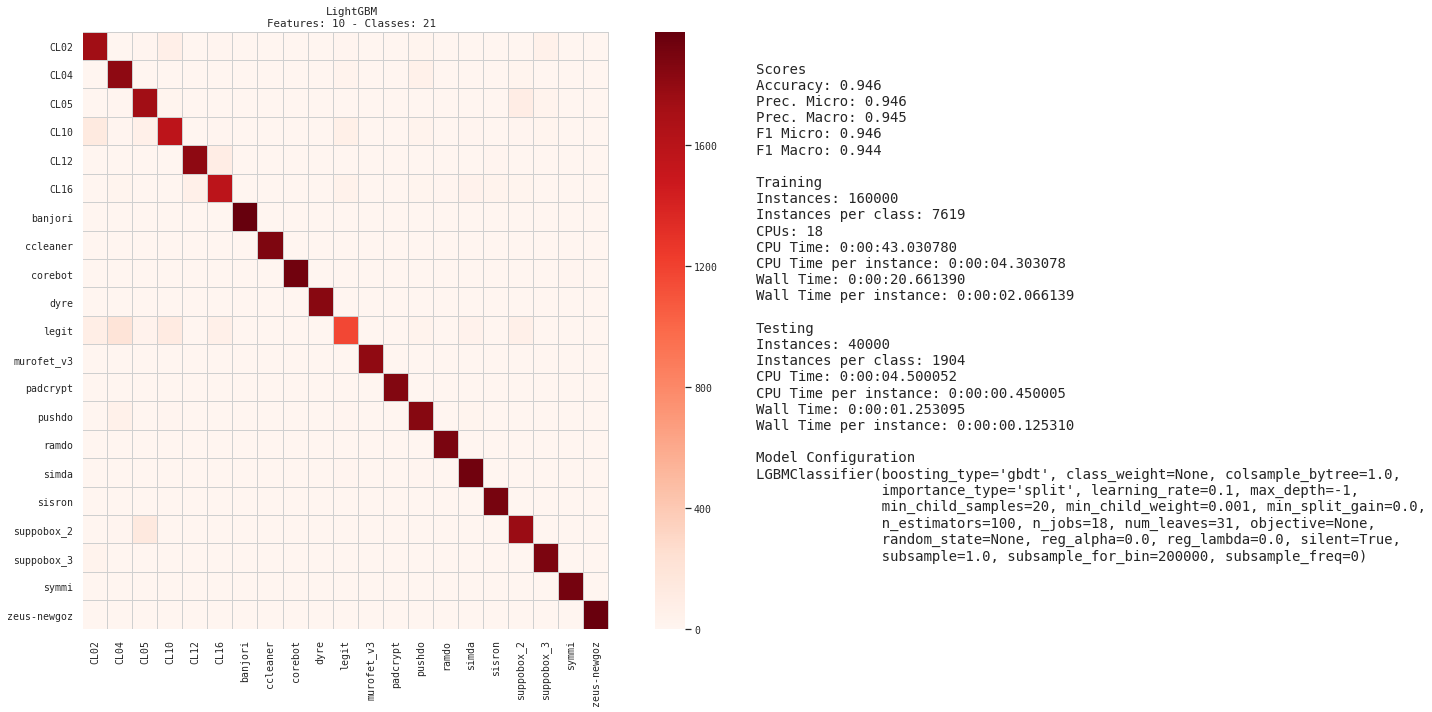

CPU times: user 5.43 s, sys: 916 ms, total: 6.35 s
Wall time: 2.31 s


In [14]:
%%time
test_labels_predicted = model.predict(test_features)
print("Accuracy:   ", metrics.accuracy_score(test_labels, test_labels_predicted))
print("Prec. Micro:", metrics.precision_score(test_labels, test_labels_predicted, average='micro'))
print("Prec. Macro:", metrics.precision_score(test_labels, test_labels_predicted, average='macro'))
print("F1 Micro:   ", metrics.f1_score(test_labels, test_labels_predicted, average='micro'))
print("F1 Macro:   ", metrics.f1_score(test_labels, test_labels_predicted, average='macro'))

scores = {
    "Accuracy":    metrics.accuracy_score(test_labels, test_labels_predicted),
    "Prec. Micro": metrics.precision_score(test_labels, test_labels_predicted, average='micro'),
    "Prec. Macro": metrics.precision_score(test_labels, test_labels_predicted, average='macro'),
    "F1 Micro":    metrics.f1_score(test_labels, test_labels_predicted, average='micro'),
    "F1 Macro":    metrics.f1_score(test_labels, test_labels_predicted, average='macro'),
}

cfmtrx = metrics.confusion_matrix(test_labels, test_labels_predicted)
fig = plt.figure(figsize=(20,10))
g = sns.heatmap(cfmtrx, yticklabels=labels.cat.categories, xticklabels=labels.cat.categories, annot=False, cmap="Reds", linecolor="#cfcfcf", linewidths=0.01)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
left, right = g.get_xlim()
g.set_xlim(left, right + 0.5)
g.set_title("LightGBM\nFeatures: " + str(train_features.shape[1]) + " - Classes: " + str(len(list(labels.cat.categories))))

text = "Scores\n" + '\n'.join([k+": "+ "{:.3f}".format(v) for k,v in scores.items()]) \
    + "\n\nTraining\nInstances: " + str(train_features.shape[0]) + "\nInstances per class: " + str(math.floor(train_features.shape[0]/len(sampled_labels.unique()))) \
    + "\nCPUs: " + str(njobs) \
    + "\nCPU Time: " + str(times['train']['cpu']['total']) + "\nCPU Time per instance: " + str(times['train']['cpu']['instance']) \
    + "\nWall Time: " + str(times['train']['wall']['total']) + "\nWall Time per instance: " + str(times['train']['wall']['instance']) \
    + "\n\nTesting\nInstances: " + str(test_features.shape[0]) + "\nInstances per class: " + str(math.floor(test_features.shape[0]/len(sampled_labels.unique()))) \
    + "\nCPU Time: " + str(times['test']['cpu']['total']) + "\nCPU Time per instance: " + str(times['test']['cpu']['instance']) \
    + "\nWall Time: " + str(times['test']['wall']['total']) + "\nWall Time per instance: " + str(times['test']['wall']['instance']) \
    + "\n\nModel Configuration\n" + str(model)
g.text(1.25, 0.95, text, transform=g.transAxes, fontsize=14, verticalalignment='top')
plt.tight_layout()
plt.savefig(GRAPHICS_DIR + "LightGBM-FS"+str(train_features.shape[1])+"-CPU"+str(njobs)+"-Cl"+ str(len(list(labels.cat.categories))) +"-TrIn"+str(train_features.shape[0])+"." + FIG_EXTENSION)
plt.show()
plt.close()

In [15]:
import pickle
with open(MODELS_DIR + "lightgbm-FS"+str(train_features.shape[1])+"-Cl"+ str(len(list(labels.cat.categories))) +"-TrIn"+str(train_features.shape[0])+".scikit", 'wb') as dumpfile:
    pickle.dump(model, dumpfile)

## Test with Random Forest

In [16]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs=njobs)

times = {}
times['train'] = {
        'wall': {'total': 0, 'instance': 0},
        'cpu': {'total': 0, 'instance': 0},
    }
times['test'] = {
        'wall': {'total': 0, 'instance': 0},
        'cpu': {'total': 0, 'instance': 0},
    }

start_time, start_resources = timestamp(), resource_usage(RUSAGE_SELF)
model.fit(train_features, train_labels)
end_resources, end_time = resource_usage(RUSAGE_SELF), timestamp()
times['train']['wall']['total'] = timedelta(seconds=end_time - start_time)
times['train']['wall']['instance'] = times['train']['wall']['total'] / train_features.shape[1]
times['train']['cpu']['total'] = timedelta(seconds=end_resources.ru_utime - start_resources.ru_utime)
times['train']['cpu']['instance'] = times['train']['cpu']['total'] / train_features.shape[1]

start_time, start_resources = timestamp(), resource_usage(RUSAGE_SELF)
model.score(test_features, test_labels)
end_resources, end_time = resource_usage(RUSAGE_SELF), timestamp()
times['test']['wall']['total'] = timedelta(seconds=end_time - start_time)
times['test']['wall']['instance'] = times['test']['wall']['total'] / test_features.shape[1]
times['test']['cpu']['total'] = timedelta(seconds=end_resources.ru_utime - start_resources.ru_utime)
times['test']['cpu']['instance'] = times['test']['cpu']['total'] / test_features.shape[1]

CPU times: user 50.4 s, sys: 328 ms, total: 50.7 s
Wall time: 13.3 s


Accuracy:    0.936375
Prec. Micro: 0.936375
Prec. Macro: 0.9360862962269162
F1 Micro:    0.936375
F1 Macro:    0.9347607753461799


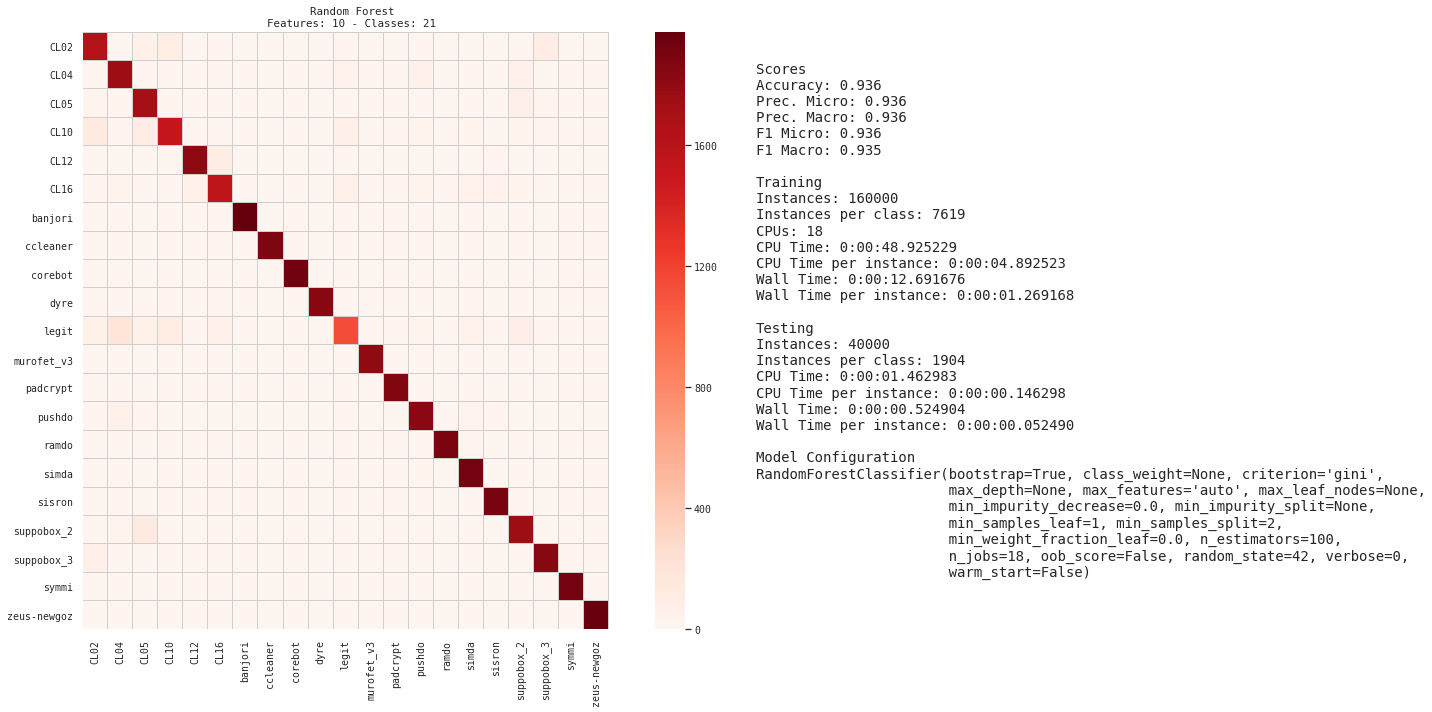

CPU times: user 2.26 s, sys: 102 ms, total: 2.36 s
Wall time: 1.33 s


In [17]:
%%time
test_labels_predicted = model.predict(test_features)
print("Accuracy:   ", metrics.accuracy_score(test_labels, test_labels_predicted))
print("Prec. Micro:", metrics.precision_score(test_labels, test_labels_predicted, average='micro'))
print("Prec. Macro:", metrics.precision_score(test_labels, test_labels_predicted, average='macro'))
print("F1 Micro:   ", metrics.f1_score(test_labels, test_labels_predicted, average='micro'))
print("F1 Macro:   ", metrics.f1_score(test_labels, test_labels_predicted, average='macro'))

scores = {
    "Accuracy":    metrics.accuracy_score(test_labels, test_labels_predicted),
    "Prec. Micro": metrics.precision_score(test_labels, test_labels_predicted, average='micro'),
    "Prec. Macro": metrics.precision_score(test_labels, test_labels_predicted, average='macro'),
    "F1 Micro":   metrics.f1_score(test_labels, test_labels_predicted, average='micro'),
    "F1 Macro":   metrics.f1_score(test_labels, test_labels_predicted, average='macro'),
}

cfmtrx = metrics.confusion_matrix(test_labels, test_labels_predicted)
fig = plt.figure(figsize=(20,10))
g = sns.heatmap(cfmtrx, yticklabels=labels.cat.categories, xticklabels=labels.cat.categories, annot=False, cmap="Reds", linecolor="#cfcfcf", linewidths=0.01)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
left, right = g.get_xlim()
g.set_xlim(left, right + 0.5)
g.set_title("Random Forest\nFeatures: " + str(train_features.shape[1]) + " - Classes: " + str(len(list(labels.cat.categories))))

text = "Scores\n" + '\n'.join([k+": "+ "{:.3f}".format(v) for k,v in scores.items()]) \
    + "\n\nTraining\nInstances: " + str(train_features.shape[0]) + "\nInstances per class: " + str(math.floor(train_features.shape[0]/len(sampled_labels.unique()))) \
    + "\nCPUs: " + str(njobs) \
    + "\nCPU Time: " + str(times['train']['cpu']['total']) + "\nCPU Time per instance: " + str(times['train']['cpu']['instance']) \
    + "\nWall Time: " + str(times['train']['wall']['total']) + "\nWall Time per instance: " + str(times['train']['wall']['instance']) \
    + "\n\nTesting\nInstances: " + str(test_features.shape[0]) + "\nInstances per class: " + str(math.floor(test_features.shape[0]/len(sampled_labels.unique()))) \
    + "\nCPU Time: " + str(times['test']['cpu']['total']) + "\nCPU Time per instance: " + str(times['test']['cpu']['instance']) \
    + "\nWall Time: " + str(times['test']['wall']['total']) + "\nWall Time per instance: " + str(times['test']['wall']['instance']) \
    + "\n\nModel Configuration\n" + str(model)
g.text(1.25, 0.95, text, transform=g.transAxes, fontsize=14, verticalalignment='top')
plt.tight_layout()
plt.savefig(GRAPHICS_DIR + "RandomForest-FS"+str(train_features.shape[1])+"-CPU"+str(njobs)+"-Cl"+ str(len(list(labels.cat.categories))) +"-TrIn"+str(train_features.shape[0])+"." + FIG_EXTENSION)
plt.show()
plt.close()

In [18]:
with open(MODELS_DIR + "randomforest-FS"+str(train_features.shape[1])+"-Cl"+ str(len(list(labels.cat.categories))) +"-TrIn"+str(train_features.shape[0])+".scikit", 'wb') as dumpfile:
    pickle.dump(model, dumpfile)

## Test with XGBoost

In [19]:
%%time
import xgboost as xgb
model = xgb.XGBClassifier(random_state=42, learning_rate=0.01, n_jobs=njobs)

times = {}
times['train'] = {
        'wall': {'total': 0, 'instance': 0},
        'cpu': {'total': 0, 'instance': 0},
    }
times['test'] = {
        'wall': {'total': 0, 'instance': 0},
        'cpu': {'total': 0, 'instance': 0},
    }

start_time, start_resources = timestamp(), resource_usage(RUSAGE_SELF)
model.fit(train_features, train_labels)
end_resources, end_time = resource_usage(RUSAGE_SELF), timestamp()
times['train']['wall']['total'] = timedelta(seconds=end_time - start_time)
times['train']['wall']['instance'] = times['train']['wall']['total'] / train_features.shape[1]
times['train']['cpu']['total'] = timedelta(seconds=end_resources.ru_utime - start_resources.ru_utime)
times['train']['cpu']['instance'] = times['train']['cpu']['total'] / train_features.shape[1]

start_time, start_resources = timestamp(), resource_usage(RUSAGE_SELF)
model.score(test_features, test_labels)
end_resources, end_time = resource_usage(RUSAGE_SELF), timestamp()
times['test']['wall']['total'] = timedelta(seconds=end_time - start_time)
times['test']['wall']['instance'] = times['test']['wall']['total'] / test_features.shape[1]
times['test']['cpu']['total'] = timedelta(seconds=end_resources.ru_utime - start_resources.ru_utime)
times['test']['cpu']['instance'] = times['test']['cpu']['total'] / test_features.shape[1]

KeyboardInterrupt: 

In [20]:
%%time
test_labels_predicted = model.predict(test_features)
print("Accuracy:   ", metrics.accuracy_score(test_labels, test_labels_predicted))
print("Prec. Micro:", metrics.precision_score(test_labels, test_labels_predicted, average='micro'))
print("Prec. Macro:", metrics.precision_score(test_labels, test_labels_predicted, average='macro'))
print("F1 Micro:   ", metrics.f1_score(test_labels, test_labels_predicted, average='micro'))
print("F1 Macro:   ", metrics.f1_score(test_labels, test_labels_predicted, average='macro'))


scores = {
    "Accuracy":    metrics.accuracy_score(test_labels, test_labels_predicted),
    "Prec. Micro": metrics.precision_score(test_labels, test_labels_predicted, average='micro'),
    "Prec. Macro": metrics.precision_score(test_labels, test_labels_predicted, average='macro'),
    "F1 Micro":   metrics.f1_score(test_labels, test_labels_predicted, average='micro'),
    "F1 Macro":   metrics.f1_score(test_labels, test_labels_predicted, average='macro'),
}

cfmtrx = metrics.confusion_matrix(test_labels, test_labels_predicted)
fig = plt.figure(figsize=(20,10))
g = sns.heatmap(cfmtrx, yticklabels=labels.cat.categories, xticklabels=labels.cat.categories, annot=False, cmap="Reds", linecolor="#cfcfcf", linewidths=0.01)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
left, right = g.get_xlim()
g.set_xlim(left, right + 0.5)
g.set_title("XGBoost\nFeatures: " + str(train_features.shape[1]) + " - Classes: " + str(len(list(labels.cat.categories))))

text = "Scores\n" + '\n'.join([k+": "+ "{:.3f}".format(v) for k,v in scores.items()]) \
    + "\n\nTraining\nInstances: " + str(train_features.shape[0]) + "\nInstances per class: " + str(math.floor(train_features.shape[0]/len(sampled_labels.unique()))) \
    + "\nCPUs: " + str(njobs) \
    + "\nCPU Time: " + str(times['train']['cpu']['total']) + "\nCPU Time per instance: " + str(times['train']['cpu']['instance']) \
    + "\nWall Time: " + str(times['train']['wall']['total']) + "\nWall Time per instance: " + str(times['train']['wall']['instance']) \
    + "\n\nTesting\nInstances: " + str(test_features.shape[0]) + "\nInstances per class: " + str(math.floor(test_features.shape[0]/len(sampled_labels.unique()))) \
    + "\nCPU Time: " + str(times['test']['cpu']['total']) + "\nCPU Time per instance: " + str(times['test']['cpu']['instance']) \
    + "\nWall Time: " + str(times['test']['wall']['total']) + "\nWall Time per instance: " + str(times['test']['wall']['instance']) \
    + "\n\nModel Configuration\n" + str(model)
g.text(1.25, 0.95, text, transform=g.transAxes, fontsize=14, verticalalignment='top')
plt.tight_layout()
plt.savefig(GRAPHICS_DIR + "XGBoost-FS"+str(train_features.shape[1])+"-CPU"+str(njobs)+"-Cl"+ str(len(list(labels.cat.categories))) +"-TrIn"+str(train_features.shape[0])+"." + FIG_EXTENSION)
plt.show()
plt.close()

XGBoostError: need to call fit or load_model beforehand

In [21]:
with open(MODELS_DIR + "xgboost-FS"+str(train_features.shape[1])+"-Cl"+ str(len(list(labels.cat.categories))) +"-TrIn"+str(train_features.shape[0])+".scikit", 'wb') as dumpfile:
    pickle.dump(model, dumpfile)

# Feature Selection

In [54]:
from sklearn.feature_selection import RFE

import lightgbm as lgb
model = lgb.LGBMClassifier(n_jobs=njobs)

selector = RFE(model, n_features_to_select=10)

In [55]:
%%time
selector = selector.fit(train_features, train_labels)

CPU times: user 17h 15min 8s, sys: 45min, total: 18h 9s
Wall time: 1h 18min 21s


In [56]:
display(selector.support_)
sum(selector.support_)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

10

In [57]:
features.columns[selector.support_]

Index(['nlp_1g_norm', 'nlp_1g_tpstd', 'nlp_2g_dst_em', 'nlp_2g_tpstd',
       'nlp_3g_dst_em', 'nlp_3g_dst_eu', 'nlp_3g_norm', 'nlp_l_2dn',
       'nlp_r_con_2dn', 'nlp_r_let_fqdn'],
      dtype='object')

In [58]:
selector.ranking_

array([ 91,  80,  52,  46,  71,  24,  26,   6,  31,   4,   8,  35,  11,
        13,  43, 114,   1,  54,  27,  72,  94, 104,  62,  67,  40, 108,
        15,  22,   1,  44,   3,  65,  34,  55,  58,  95, 107, 110, 113,
        87,  74,  19,  50,   1,  23,   9,  39,  42,  25,  56,  77, 109,
        14,  38,  45,  83,  93, 116,  81,  86,  85, 120,  59,  16,   1,
        92,  36,  53,  60,  61, 100,  96, 103, 101, 112, 105,  73,  33,
        69,   1,   1,  17,  51,  64,   5,  75,  84, 117,   1,  63,  49,
        76, 121, 102,  90,  89,  99, 119,  57,  28,  37, 118,   2,  97,
        70,  12,  98, 115,   1,  20,  68,  10,  41,  29, 111,   1,  21,
        78,  18,   1,  88,  66,  47,  79,  82,  30, 106,  32,   7,  48])

In [59]:
model = selector.estimator_

In [60]:
reduced_test_features = selector.transform(test_features)
reduced_train_features = selector.transform(train_features)

print('Training Features Shape:', reduced_train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Training Instances per class:', math.floor(train_labels.shape[0]/len(sampled_labels.unique())))
print('Testing Features Shape:', reduced_test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Testing Instances per class:', math.floor(test_labels.shape[0]/len(sampled_labels.unique())))

Training Features Shape: (160000, 10)
Training Labels Shape: (160000,)
Training Instances per class: 7619
Testing Features Shape: (40000, 10)
Testing Labels Shape: (40000,)
Testing Instances per class: 1904


In [61]:
%%time
import lightgbm as lgb
model = lgb.LGBMClassifier(n_jobs=njobs)

times = {}
times['train'] = {
        'wall': {'total': 0, 'instance': 0},
        'cpu': {'total': 0, 'instance': 0},
    }
times['test'] = {
        'wall': {'total': 0, 'instance': 0},
        'cpu': {'total': 0, 'instance': 0},q
    }

start_time, start_resources = timestamp(), resource_usage(RUSAGE_SELF)
model.fit(reduced_train_features, train_labels)
end_resources, end_time = resource_usage(RUSAGE_SELF), timestamp()
times['train']['wall']['total'] = timedelta(seconds=end_time - start_time)
times['train']['wall']['instance'] = times['train']['wall']['total'] / train_features.shape[1]
times['train']['cpu']['total'] = timedelta(seconds=end_resources.ru_utime - start_resources.ru_utime)
times['train']['cpu']['instance'] = times['train']['cpu']['total'] / train_features.shape[1]

start_time, start_resources = timestamp(), resource_usage(RUSAGE_SELF)
model.score(reduced_test_features, test_labels)
end_resources, end_time = resource_usage(RUSAGE_SELF), timestamp()
times['test']['wall']['total'] = timedelta(seconds=end_time - start_time)
times['test']['wall']['instance'] = times['test']['wall']['total'] / test_features.shape[1]
times['test']['cpu']['total'] = timedelta(seconds=end_resources.ru_utime - start_resources.ru_utime)
times['test']['cpu']['instance'] = times['test']['cpu']['total'] / test_features.shape[1]

CPU times: user 3min 35s, sys: 10.1 s, total: 3min 45s
Wall time: 15.9 s


Accuracy:    0.945525
Prec. Micro: 0.945525
Prec. Macro: 0.9449893379787158
F1 Micro:    0.945525
F1 Macro:    0.9439130392097527


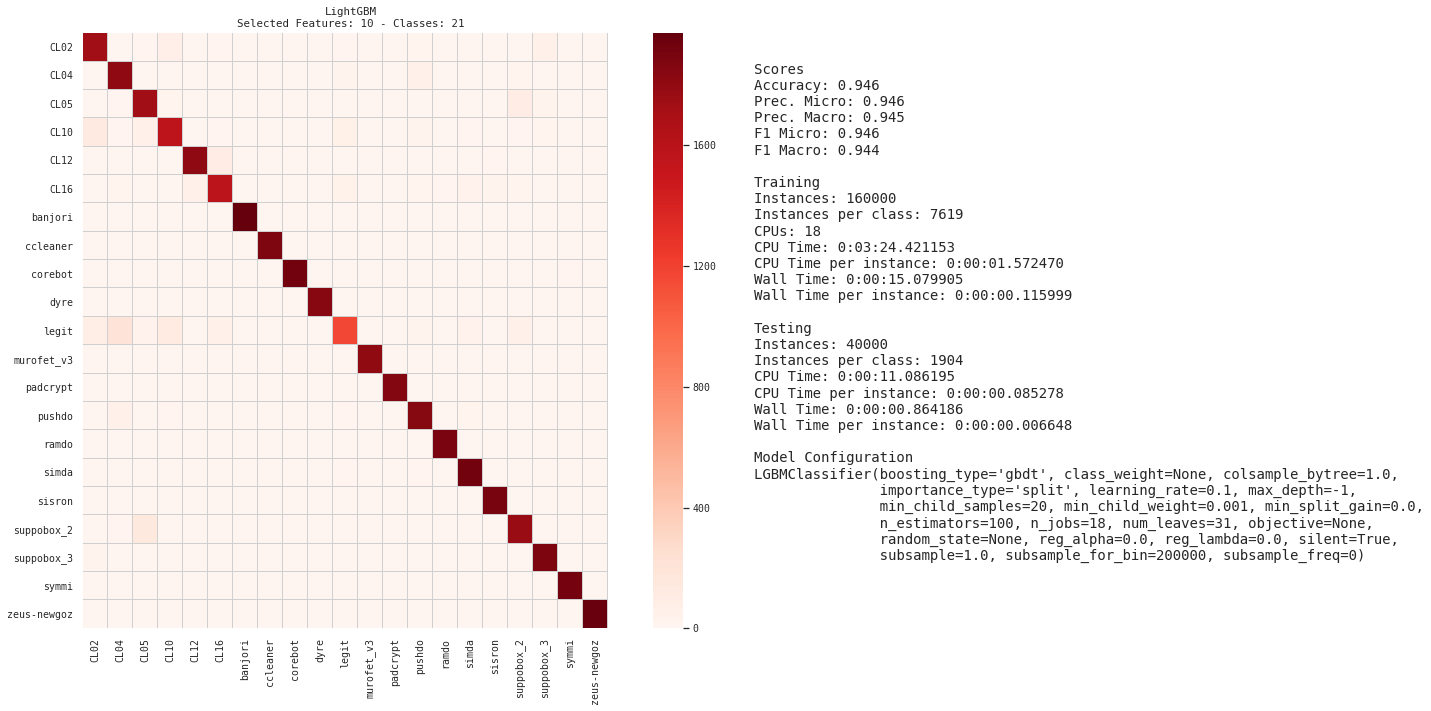

CPU times: user 13 s, sys: 279 ms, total: 13.3 s
Wall time: 2.05 s


In [62]:
%%time
test_labels_predicted = model.predict(reduced_test_features)
print("Accuracy:   ", metrics.accuracy_score(test_labels, test_labels_predicted))
print("Prec. Micro:", metrics.precision_score(test_labels, test_labels_predicted, average='micro'))
print("Prec. Macro:", metrics.precision_score(test_labels, test_labels_predicted, average='macro'))
print("F1 Micro:   ", metrics.f1_score(test_labels, test_labels_predicted, average='micro'))
print("F1 Macro:   ", metrics.f1_score(test_labels, test_labels_predicted, average='macro'))

scores = {
    "Accuracy":    metrics.accuracy_score(test_labels, test_labels_predicted),
    "Prec. Micro": metrics.precision_score(test_labels, test_labels_predicted, average='micro'),
    "Prec. Macro": metrics.precision_score(test_labels, test_labels_predicted, average='macro'),
    "F1 Micro":    metrics.f1_score(test_labels, test_labels_predicted, average='micro'),
    "F1 Macro":    metrics.f1_score(test_labels, test_labels_predicted, average='macro'),
}

cfmtrx = metrics.confusion_matrix(test_labels, test_labels_predicted)
fig = plt.figure(figsize=(20,10))
g = sns.heatmap(cfmtrx, yticklabels=labels.cat.categories, xticklabels=labels.cat.categories, annot=False, cmap="Reds", linecolor="#cfcfcf", linewidths=0.01)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
left, right = g.get_xlim()
g.set_xlim(left, right + 0.5)
g.set_title("LightGBM\nSelected Features: " + str(reduced_train_features.shape[1]) + " - Classes: " + str(len(list(labels.cat.categories))))

text = "Scores\n" + '\n'.join([k+": "+ "{:.3f}".format(v) for k,v in scores.items()]) \
    + "\n\nTraining\nInstances: " + str(reduced_train_features.shape[0]) + "\nInstances per class: " + str(math.floor(reduced_train_features.shape[0]/len(sampled_labels.unique()))) \
    + "\nCPUs: " + str(njobs) \
    + "\nCPU Time: " + str(times['train']['cpu']['total']) + "\nCPU Time per instance: " + str(times['train']['cpu']['instance']) \
    + "\nWall Time: " + str(times['train']['wall']['total']) + "\nWall Time per instance: " + str(times['train']['wall']['instance']) \
    + "\n\nTesting\nInstances: " + str(reduced_test_features.shape[0]) + "\nInstances per class: " + str(math.floor(reduced_test_features.shape[0]/len(sampled_labels.unique()))) \
    + "\nCPU Time: " + str(times['test']['cpu']['total']) + "\nCPU Time per instance: " + str(times['test']['cpu']['instance']) \
    + "\nWall Time: " + str(times['test']['wall']['total']) + "\nWall Time per instance: " + str(times['test']['wall']['instance']) \
    + "\n\nModel Configuration\n" + str(model)
g.text(1.25, 0.95, text, transform=g.transAxes, fontsize=14, verticalalignment='top')
plt.tight_layout()
plt.savefig(GRAPHICS_DIR + "LightGBM-FS"+str(reduced_train_features.shape[1])+"-CPU"+str(njobs)+"-Cl"+ str(len(list(labels.cat.categories))) +"-TrIn"+str(reduced_train_features.shape[0])+"." + FIG_EXTENSION)
plt.show()
plt.close()

In [63]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs=njobs)

times = {}
times['train'] = {
        'wall': {'total': 0, 'instance': 0},
        'cpu': {'total': 0, 'instance': 0},
    }
times['test'] = {
        'wall': {'total': 0, 'instance': 0},
        'cpu': {'total': 0, 'instance': 0},
    }

start_time, start_resources = timestamp(), resource_usage(RUSAGE_SELF)
model.fit(reduced_train_features, train_labels)
end_resources, end_time = resource_usage(RUSAGE_SELF), timestamp()
times['train']['wall']['total'] = timedelta(seconds=end_time - start_time)
times['train']['wall']['instance'] = times['train']['wall']['total'] / train_features.shape[1]
times['train']['cpu']['total'] = timedelta(seconds=end_resources.ru_utime - start_resources.ru_utime)
times['train']['cpu']['instance'] = times['train']['cpu']['total'] / train_features.shape[1]

start_time, start_resources = timestamp(), resource_usage(RUSAGE_SELF)
model.score(reduced_test_features, test_labels)
end_resources, end_time = resource_usage(RUSAGE_SELF), timestamp()
times['test']['wall']['total'] = timedelta(seconds=end_time - start_time)
times['test']['wall']['instance'] = times['test']['wall']['total'] / test_features.shape[1]
times['test']['cpu']['total'] = timedelta(seconds=end_resources.ru_utime - start_resources.ru_utime)
times['test']['cpu']['instance'] = times['test']['cpu']['total'] / test_features.shape[1]

CPU times: user 1min 26s, sys: 17.7 ms, total: 1min 26s
Wall time: 7.04 s


Accuracy:    0.937475
Prec. Micro: 0.937475
Prec. Macro: 0.9372684505523756
F1 Micro:    0.937475
F1 Macro:    0.9359263172377471


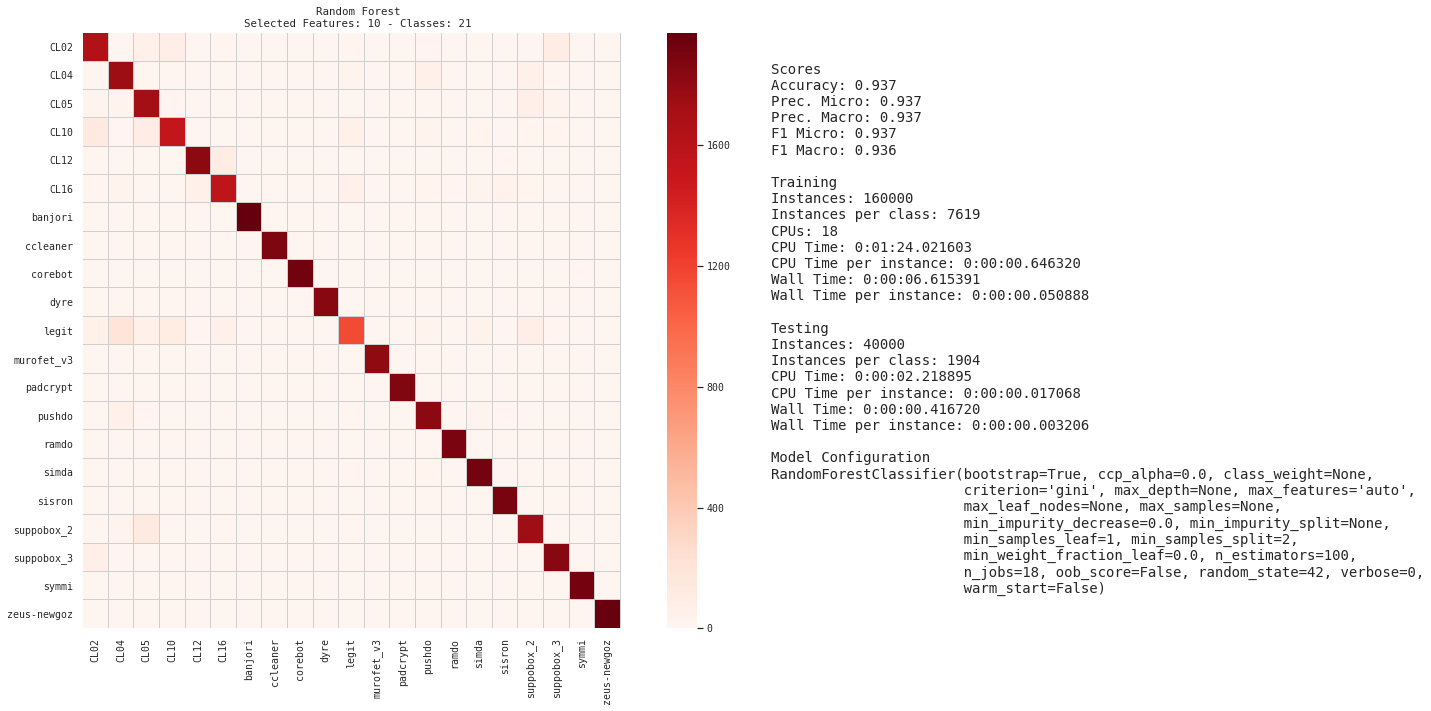

CPU times: user 3.13 s, sys: 87.8 ms, total: 3.21 s
Wall time: 1.66 s


In [64]:
%%time
test_labels_predicted = model.predict(reduced_test_features)
print("Accuracy:   ", metrics.accuracy_score(test_labels, test_labels_predicted))
print("Prec. Micro:", metrics.precision_score(test_labels, test_labels_predicted, average='micro'))
print("Prec. Macro:", metrics.precision_score(test_labels, test_labels_predicted, average='macro'))
print("F1 Micro:   ", metrics.f1_score(test_labels, test_labels_predicted, average='micro'))
print("F1 Macro:   ", metrics.f1_score(test_labels, test_labels_predicted, average='macro'))

scores = {
    "Accuracy":    metrics.accuracy_score(test_labels, test_labels_predicted),
    "Prec. Micro": metrics.precision_score(test_labels, test_labels_predicted, average='micro'),
    "Prec. Macro": metrics.precision_score(test_labels, test_labels_predicted, average='macro'),
    "F1 Micro":    metrics.f1_score(test_labels, test_labels_predicted, average='micro'),
    "F1 Macro":    metrics.f1_score(test_labels, test_labels_predicted, average='macro'),
}

cfmtrx = metrics.confusion_matrix(test_labels, test_labels_predicted)
fig = plt.figure(figsize=(20,10))
g = sns.heatmap(cfmtrx, yticklabels=labels.cat.categories, xticklabels=labels.cat.categories, annot=False, cmap="Reds", linecolor="#cfcfcf", linewidths=0.01)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
left, right = g.get_xlim()
g.set_xlim(left, right + 0.5)
g.set_title("Random Forest\nSelected Features: " + str(reduced_train_features.shape[1]) + " - Classes: " + str(len(list(labels.cat.categories))))

text = "Scores\n" + '\n'.join([k+": "+ "{:.3f}".format(v) for k,v in scores.items()]) \
    + "\n\nTraining\nInstances: " + str(reduced_train_features.shape[0]) + "\nInstances per class: " + str(math.floor(reduced_train_features.shape[0]/len(sampled_labels.unique()))) \
    + "\nCPUs: " + str(njobs) \
    + "\nCPU Time: " + str(times['train']['cpu']['total']) + "\nCPU Time per instance: " + str(times['train']['cpu']['instance']) \
    + "\nWall Time: " + str(times['train']['wall']['total']) + "\nWall Time per instance: " + str(times['train']['wall']['instance']) \
    + "\n\nTesting\nInstances: " + str(reduced_test_features.shape[0]) + "\nInstances per class: " + str(math.floor(reduced_test_features.shape[0]/len(sampled_labels.unique()))) \
    + "\nCPU Time: " + str(times['test']['cpu']['total']) + "\nCPU Time per instance: " + str(times['test']['cpu']['instance']) \
    + "\nWall Time: " + str(times['test']['wall']['total']) + "\nWall Time per instance: " + str(times['test']['wall']['instance']) \
    + "\n\nModel Configuration\n" + str(model)
g.text(1.25, 0.95, text, transform=g.transAxes, fontsize=14, verticalalignment='top')
plt.tight_layout()
plt.savefig(GRAPHICS_DIR + "RandomForest-FS"+str(reduced_train_features.shape[1])+"-CPU"+str(njobs)+"-Cl"+ str(len(list(labels.cat.categories))) +"-TrIn"+str(reduced_train_features.shape[0])+"." + FIG_EXTENSION)
plt.show()
plt.close()

In [65]:
%%time
import xgboost as xgb
model = xgb.XGBClassifier(random_state=42, learning_rate=0.01, n_jobs=njobs)

times = {}
times['train'] = {
        'wall': {'total': 0, 'instance': 0},
        'cpu': {'total': 0, 'instance': 0},
    }
times['test'] = {
        'wall': {'total': 0, 'instance': 0},
        'cpu': {'total': 0, 'instance': 0},
    }

start_time, start_resources = timestamp(), resource_usage(RUSAGE_SELF)
model.fit(reduced_train_features, train_labels)
end_resources, end_time = resource_usage(RUSAGE_SELF), timestamp()
times['train']['wall']['total'] = timedelta(seconds=end_time - start_time)
times['train']['wall']['instance'] = times['train']['wall']['total'] / train_features.shape[1]
times['train']['cpu']['total'] = timedelta(seconds=end_resources.ru_utime - start_resources.ru_utime)
times['train']['cpu']['instance'] = times['train']['cpu']['total'] / train_features.shape[1]

start_time, start_resources = timestamp(), resource_usage(RUSAGE_SELF)
model.score(reduced_test_features, test_labels)
end_resources, end_time = resource_usage(RUSAGE_SELF), timestamp()
times['test']['wall']['total'] = timedelta(seconds=end_time - start_time)
times['test']['wall']['instance'] = times['test']['wall']['total'] / test_features.shape[1]
times['test']['cpu']['total'] = timedelta(seconds=end_resources.ru_utime - start_resources.ru_utime)
times['test']['cpu']['instance'] = times['test']['cpu']['total'] / test_features.shape[1]

CPU times: user 31min 24s, sys: 1min 50s, total: 33min 14s
Wall time: 2min 24s


Accuracy:    0.9145
Prec. Micro: 0.9145
Prec. Macro: 0.9174358423616795
F1 Micro:    0.9145
F1 Macro:    0.911884591523391


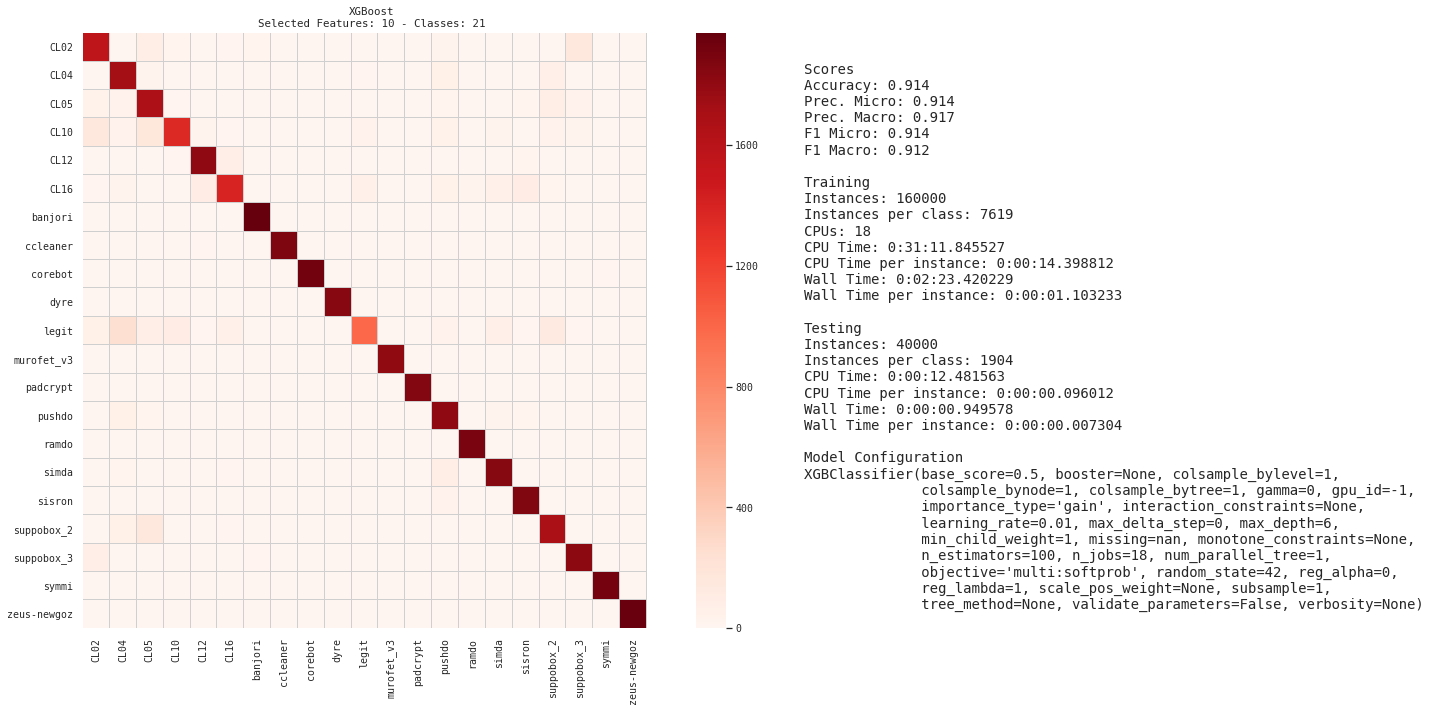

CPU times: user 15.3 s, sys: 385 ms, total: 15.6 s
Wall time: 2.24 s


In [66]:
%%time
test_labels_predicted = model.predict(reduced_test_features)
print("Accuracy:   ", metrics.accuracy_score(test_labels, test_labels_predicted))
print("Prec. Micro:", metrics.precision_score(test_labels, test_labels_predicted, average='micro'))
print("Prec. Macro:", metrics.precision_score(test_labels, test_labels_predicted, average='macro'))
print("F1 Micro:   ", metrics.f1_score(test_labels, test_labels_predicted, average='micro'))
print("F1 Macro:   ", metrics.f1_score(test_labels, test_labels_predicted, average='macro'))

scores = {
    "Accuracy":    metrics.accuracy_score(test_labels, test_labels_predicted),
    "Prec. Micro": metrics.precision_score(test_labels, test_labels_predicted, average='micro'),
    "Prec. Macro": metrics.precision_score(test_labels, test_labels_predicted, average='macro'),
    "F1 Micro":    metrics.f1_score(test_labels, test_labels_predicted, average='micro'),
    "F1 Macro":    metrics.f1_score(test_labels, test_labels_predicted, average='macro'),
}

cfmtrx = metrics.confusion_matrix(test_labels, test_labels_predicted)
fig = plt.figure(figsize=(20,10))
g = sns.heatmap(cfmtrx, yticklabels=labels.cat.categories, xticklabels=labels.cat.categories, annot=False, cmap="Reds", linecolor="#cfcfcf", linewidths=0.01)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
left, right = g.get_xlim()
g.set_xlim(left, right + 0.5)
g.set_title("XGBoost\nSelected Features: " + str(reduced_train_features.shape[1]) + " - Classes: " + str(len(list(labels.cat.categories))))

text = "Scores\n" + '\n'.join([k+": "+ "{:.3f}".format(v) for k,v in scores.items()]) \
    + "\n\nTraining\nInstances: " + str(reduced_train_features.shape[0]) + "\nInstances per class: " + str(math.floor(reduced_train_features.shape[0]/len(sampled_labels.unique()))) \
    + "\nCPUs: " + str(njobs) \
    + "\nCPU Time: " + str(times['train']['cpu']['total']) + "\nCPU Time per instance: " + str(times['train']['cpu']['instance']) \
    + "\nWall Time: " + str(times['train']['wall']['total']) + "\nWall Time per instance: " + str(times['train']['wall']['instance']) \
    + "\n\nTesting\nInstances: " + str(reduced_test_features.shape[0]) + "\nInstances per class: " + str(math.floor(reduced_test_features.shape[0]/len(sampled_labels.unique()))) \
    + "\nCPU Time: " + str(times['test']['cpu']['total']) + "\nCPU Time per instance: " + str(times['test']['cpu']['instance']) \
    + "\nWall Time: " + str(times['test']['wall']['total']) + "\nWall Time per instance: " + str(times['test']['wall']['instance']) \
    + "\n\nModel Configuration\n" + str(model)
g.text(1.25, 0.95, text, transform=g.transAxes, fontsize=14, verticalalignment='top')
plt.tight_layout()
plt.savefig(GRAPHICS_DIR + "XGBoost-FS"+str(reduced_train_features.shape[1])+"-CPU"+str(njobs)+"-Cl"+ str(len(list(labels.cat.categories))) +"-TrIn"+str(reduced_train_features.shape[0])+"." + FIG_EXTENSION)
plt.show()
plt.close()

## Autoencoder

In [ ]:
def test_autoencoder(features, labels, enc_layers, dec_layers, layers_text="", epochs=32, batch_size=1000):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler    
    from keras.models import Model
    scaler = MinMaxScaler()
    features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
    features.describe()
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels.cat.codes, test_size = 0.20, random_state = 42)

    input_layer = Input(shape = (train_features.shape[1], ), name="I")
    output_layer = input_layer

    for layer in enc_layers:
        output_layer = layer(output_layer)

    for layer in dec_layers:
        output_layer = layer(output_layer)

    autoencoder = Model(input = input_layer, output = output_layer, name="Autoencoder")

    # CONFIGURE AND TRAIN THE AUTOENCODER
    autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
    autoencoder.summary()

    autoencoder.fit(train_features, train_features, epochs = epochs, batch_size = batch_size, shuffle = True, validation_data = (test_features, test_features), workers=4)

    test = autoencoder.get_layer("E_OUT")(autoencoder.get_layer("E3")(autoencoder.get_layer("E2")(autoencoder.get_layer("E1")(input_layer))))
    
    encoder_model = Model(input = input_layer, output = test, name="Encoder")
    encoded_input = Input(shape = (encoding_dim, ))
    encoded_train_features = encoder_model.predict(train_features)
    encoded_test_features = encoder_model.predict(test_features)
    
    import lightgbm as lgb
    model = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=20, n_jobs=4)
    model.fit(encoded_train_features, train_labels)
    model.score(encoded_test_features, test_labels)

    test_labels_predicted = model.predict(encoded_test_features)
    
    scores = {
        "Accuracy":    metrics.accuracy_score(test_labels, test_labels_predicted),
        "Prec. Micro": metrics.precision_score(test_labels, test_labels_predicted, average='micro'),
        "Prec. Macro": metrics.precision_score(test_labels, test_labels_predicted, average='macro'),
        "F1 Micro":   metrics.f1_score(test_labels, test_labels_predicted, average='micro'),
        "F1 Macro":   metrics.f1_score(test_labels, test_labels_predicted, average='macro'),
    }
    
    cfmtrx = metrics.confusion_matrix(test_labels, test_labels_predicted)
    fig = plt.figure(figsize=(12,10))
    g = sns.heatmap(cfmtrx, yticklabels=labels.cat.categories, xticklabels=labels.cat.categories, annot=False, cmap="Reds", linecolor="#cfcfcf", linewidths=0.01)
    bottom, top = g.get_ylim()
    g.set_ylim(bottom + 0.5, top - 0.5)
    left, right = g.get_xlim()
    g.set_xlim(left, right + 0.5)
    g.set_title("LightGBM + Autoencoder (" + str(encoded_train_features.shape[1]) + "neurons)")


    text = "Scores\n" + '\n'.join([k+": "+ "{:.3f}".format(v) for k,v in scores.items()]) + "\n\nAutoencoder Model:\n" + layers_text
    g.text(0.55, 0.95, text, transform=g.transAxes, fontsize=14, verticalalignment='top')

    plt.show()
    plt.close()

    return scores

In [ ]:
from keras.layers import Input, Dense

layers = ""

# DEFINE THE DIMENSION OF ENCODER
encoding_dim = 4*len(labels.unique())

# DEFINE THE ENCODER LAYERS
enc_layers = []
layers += "Input("+str(train_features.shape[1])+")\n"
enc_layers.append(Dense(256, activation = 'relu', name="E1"))
layers += "E1: Dense(256, 'relu')\n"
enc_layers.append(Dense(512, activation = 'relu', name="E2"))
layers += "E2: Dense(128, 'relu')\n"
enc_layers.append(Dense(1024, activation = 'relu', name="E3"))
layers += "E3: Dense(64, 'relu')\n"
enc_layers.append(Dense(encoding_dim, activation = 'relu', name="E_OUT"))
layers += "E_OUT: Dense("+str(encoding_dim)+", 'relu')\n"
layers += "---------------\n"

dec_layers = []
# DEFINE THE DECODER LAYERS
enc_layers.append(Dense(1024, activation = 'relu', name="D1"))
layers += "D1: Dense(64, 'relu')\n"
enc_layers.append(Dense(512, activation = 'relu', name="D2"))
layers += "D2: Dense(128, 'relu')\n"
enc_layers.append(Dense(256, activation = 'relu', name="D3"))
layers += "D3: Dense(256, 'relu')\n"
enc_layers.append(Dense(train_features.shape[1], activation = 'sigmoid', name="D_OUT"))
layers += "D_OUT: Dense("+str(train_features.shape[1])+", 'sigmoid')\n"
    
test_autoencoder(features, labels, enc_layers, dec_layers, layers_text = layers, epochs=32, batch_size=1000)